# `Seaborn`
<img src='data/img/logo-seaborn.jpg'></img>


___
### `Импорт`

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/covid_preproccessed.csv')
country_lst = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
df = df[ df['country'].isin(country_lst)]
populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
df_percented = df.merge(populations, on='country')
df_percented['Confirmed percented'] = df_percented['daily_confirmed'] / df_percented['population'] * 100
df_percented['date'] = pd.to_datetime(df_percented['date'])
df_percented.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           2440 non-null   int64         
 1   date                                 2440 non-null   datetime64[ns]
 2   country                              2440 non-null   object        
 3   confirmed                            2440 non-null   float64       
 4   deaths                               2440 non-null   float64       
 5   recovered                            2440 non-null   float64       
 6   active                               2440 non-null   float64       
 7   daily_confirmed                      2435 non-null   float64       
 8   daily_deaths                         2435 non-null   float64       
 9   daily_recovered                      2435 non-null   float64       
 10  total_vaccin

___
## <a>.histplot</a>( ) - Гистограмма
- `data=` : Данные (DF)
- `x=` : Значения по оси X
- `y=` : Значения по оси Y
- `hue=` : Категориальные признаки
- `ax=` : Система координат
- `color=` : Цвет графика
- `bins=` : Кол-во столбцов
- `kde=` : Сглаженная линия гистограммы
___

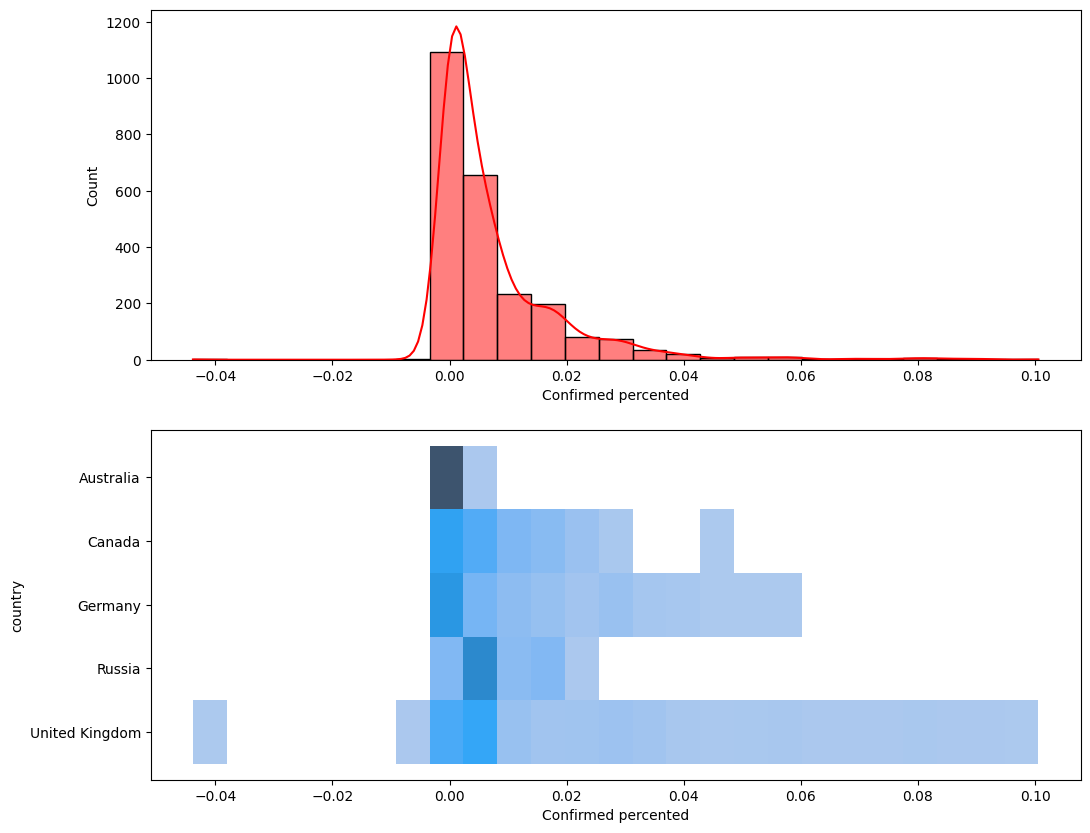

In [2]:
fig, axs = plt.subplots(2,1,figsize=(12,10))

sns.histplot(
    data=df_percented, x='Confirmed percented', ax=axs[0], bins=25, kde=True, color='red'
    )
sns.histplot(
    data=df_percented, x='Confirmed percented',y='country',  ax=axs[1], bins=25, kde=True
    );


___
## <a>.boxplot</a>( ) - `Коробчатая гистограмма`
- `data=` : Данные (DF)
- `x=` : Значения по оси X
- `y=` : Значения по оси Y
- `hue=` : Категориальные признаки
- `ax=` : Система координат
- `color=` : Цвет графика
- `orient=` : Ориентация графика
- `width=` : Ширина графика
___

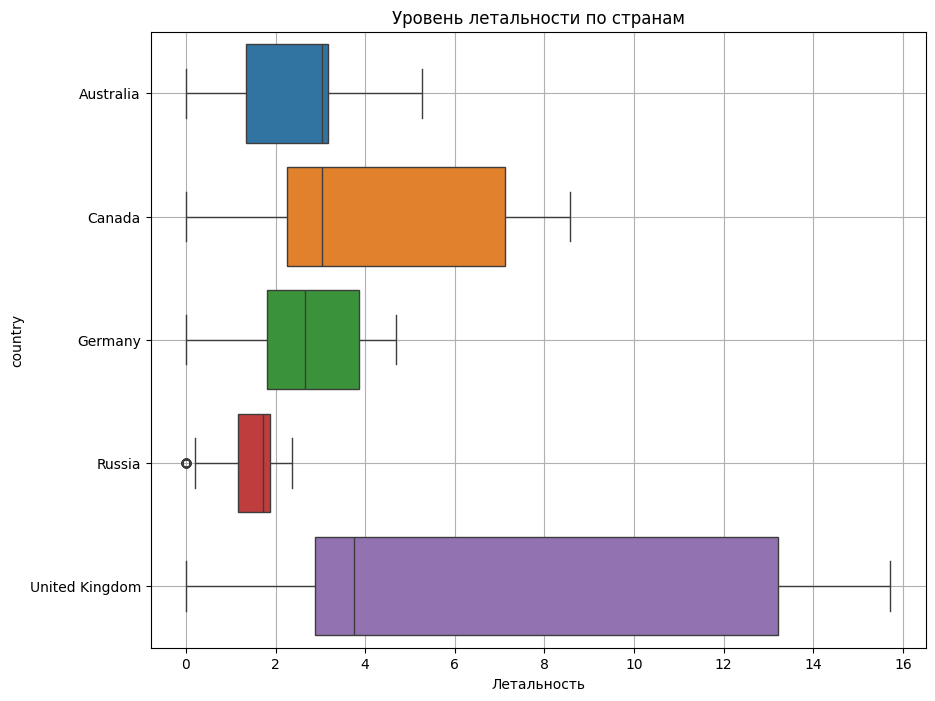

In [3]:
fig = plt.figure(figsize=(10,8))

boxplot = sns.boxplot(
    data=df_percented,
    y='country',
    x='death_rate',
    orient='h',
    width=0.8,
    hue='country')
boxplot.grid()
boxplot.set_title('Уровень летальности по странам')
boxplot.set_xlabel('Летальность');


___
## <a>.barlot</a>( ) - `Столбчатая диаграмма`
- `data=` : Данные (DF)
- `x=` : Значения по оси X
- `estimator=` : Статистическая характеристика для вычисления
- `hue=` : Категориальные признаки
- `ax=` : Система координат
- `color=` : Цвет графика
- `orient=` : Ориентация графика
- `width=` : Ширина графика
___

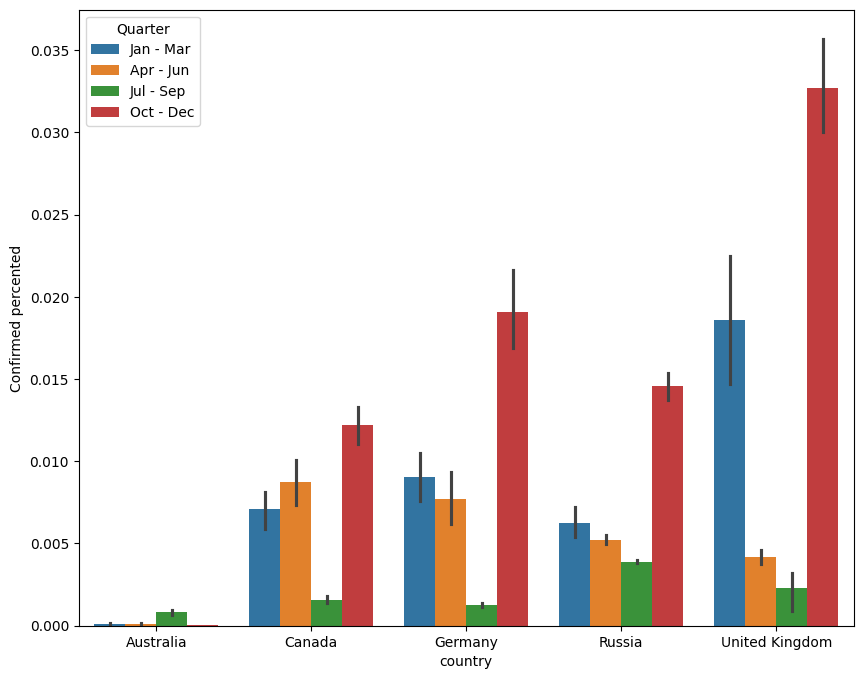

In [4]:
fig = plt.figure(figsize=(10,8))

df_percented['Quarter'] = df_percented['date'].dt.quarter
df_percented['Quarter'] = df_percented['Quarter'].apply(lambda num: 'Jan - Mar' if num == 1 else num)
df_percented['Quarter'] = df_percented['Quarter'].apply(lambda num: 'Apr - Jun' if num == 2 else num)
df_percented['Quarter'] = df_percented['Quarter'].apply(lambda num: 'Jul - Sep' if num == 3 else num)
df_percented['Quarter'] = df_percented['Quarter'].apply(lambda num: 'Oct - Dec' if num == 4 else num)

barplot = sns.barplot(
    data=df_percented,
    x='country',
    y='Confirmed percented',
    hue='Quarter',
    estimator='mean'

)


___
## <a>.joinlot</a>( ) - `Совмещенный точечный график и гистограмма`
- `data=` : Данные (DF)
- `x=` : Значения по оси X
- `y=` : Значения по оси Y
- `hue=` : Категориальные признаки
- `xlim` : Диапазон отображения значений по оси X
- `height` : Масштаб графика


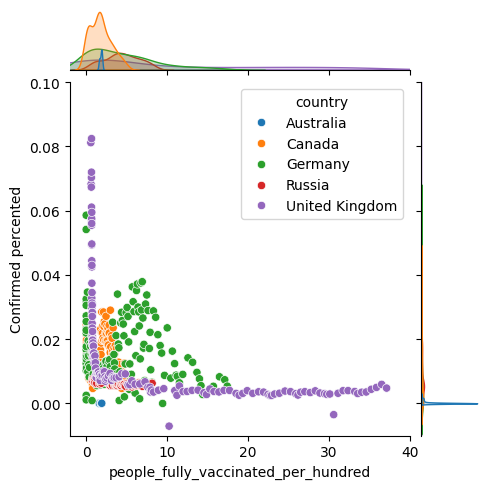

In [5]:
joinplot = sns.jointplot(data= df_percented,
                         x='people_fully_vaccinated_per_hundred',
                         y='Confirmed percented',
                         hue='country',
                         height=5,
                         xlim=(-2, 40),
                         ylim=(-0.01,0.1)
                         )


___
## <a>.heatmap</a>( ) - `Тепловая карта`
- `data=` : 2 D данные (DF)
- `vmax=` : Максимальные значения для отображения
- `vmax=` : Максимальные значения для отображения
- `cmap=` : Цветовая схема
- `annot=` : Отображение значений в клетках

In [26]:

df_percented['confirmed_per_hundred'] = df_percented['confirmed'] / df_percented['population']*100
pivot = df_percented.pivot(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
display(pivot)


date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,...,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


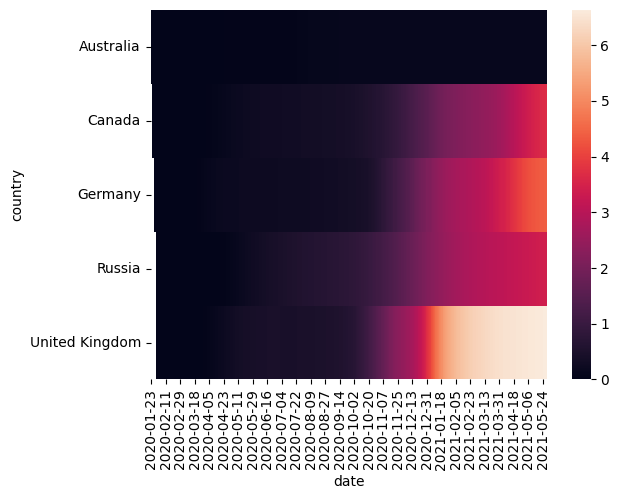

In [27]:
heatmap = sns.heatmap(data=pivot, vmin=0)
